<a href="https://colab.research.google.com/github/AnastasiaaAlekseichuk/lab/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа 6**
Методы статистического анализа данных. Проверка нормальности данных 

Вариант 8

In [141]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/List_of_highest-grossing_films_in_Japan'
req=requests.get(url)
data=pd.read_html(req.text)
df1=data[0]

In [ ]:
df = df1.rename({'Gross (¥ billion)': 'Gross'}, axis=1) 

In [169]:
df.head(35)

,Rank,Title,Gross,Year,Ref
0,1,Demon Slayer: Kimetsu no Yaiba the Movie: Muge...,3992,2020,[1]
1,2,Spirited Away,3168,2001,[2]
2,3,Titanic,2620,1997,[3]
3,4,Frozen,2548,2014,[4]
4,5,Your Name,2503,2016,[1]
5,6,Harry Potter and the Philosopher's Stone,2030,2001,[5]
6,7,Princess Mononoke,2018,1997,[2]
7,8,Howl's Moving Castle,1960,2004,[6]
8,9,Bayside Shakedown 2,1735,2003,[7]
9,1,Harry Potter and the Chamber of Secrets,1730,2002,[7]


In [171]:
df2 = df.drop(['Rank', 'Title', 'Ref'], axis=1)

In [175]:
df3 = df2.head(35)
df3

,Gross,Year
0,3992,2020
1,3168,2001
2,2620,1997
3,2548,2014
4,2503,2016
5,2030,2001
6,2018,1997
7,1960,2004
8,1735,2003
9,1730,2002


In [176]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gross   35 non-null     object
 1   Year    35 non-null     object
dtypes: object(2)
memory usage: 840.0+ bytes


In [177]:
df3['Gross']=df3["Gross"].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [179]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gross   35 non-null     int64 
 1   Year    35 non-null     object
dtypes: int64(1), object(1)
memory usage: 840.0+ bytes


In [180]:
Year = df3['Year']
Gross = df3['Gross']

# Тестовый набор данных

In [ ]:
from numpy import mean
from numpy import std

In [181]:
print('mean=%.3f std=%.3f' % (mean(Gross), std(Gross)))

mean=1575.114 std=662.657


# Визуальные проверки нормальности

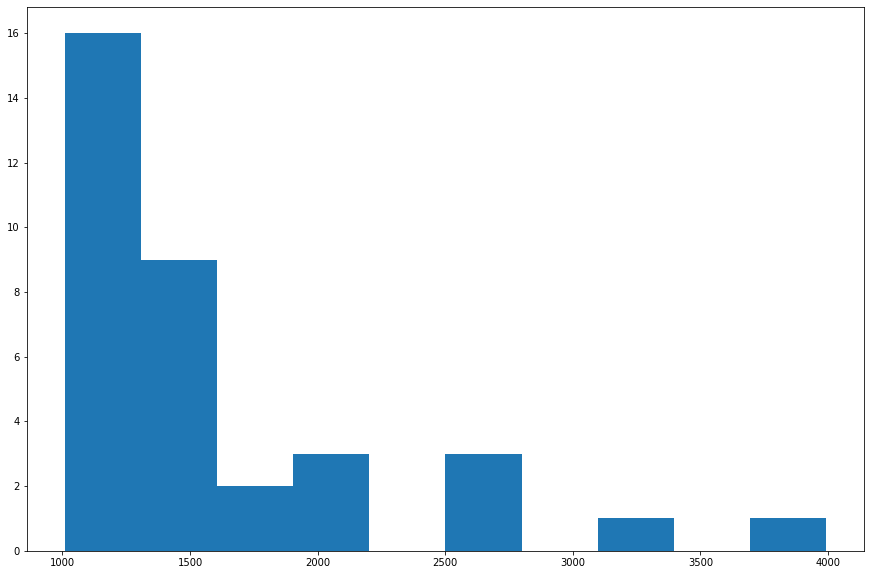

In [182]:
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
plt.figure(figsize=(15,10))
pyplot.hist(Gross)
pyplot.show()

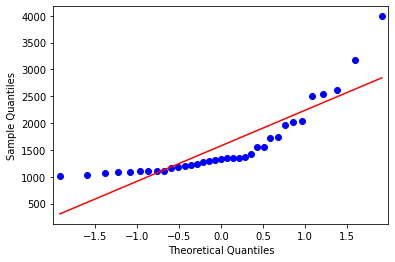

In [183]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot

qqplot(Gross, line='s')
pyplot.show()

# Статистические тесты нормальности данных

Тест Шапиро-Вилка

In [184]:
from scipy.stats import shapiro

stat, p = shapiro(Gross)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha=0.05
if p>alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not Gaussian (reject H0)')

Statistics=0.751, p=0.000
Sample does not Gaussian (reject H0)


Тест д'Агостино на K ^ 2

In [185]:
from scipy.stats import normaltest

stat, p = normaltest(Gross)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha=0.05
if p>alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not Gaussian (reject H0)')


Statistics=25.167, p=0.000
Sample does not Gaussian (reject H0)


Тест Андерсона-Дарлинга

In [186]:
from scipy.stats import anderson

result = anderson(Gross)
print('Statistics: %.3f' % result.statistic)
p=0
for i in range(len(result.critical_values)):
  sl, cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl,cv))
  else:
    print('%.3f: %.3f, data does not look normal (reject H0)' % (sl,cv))

Statistics: 3.017
15.000: 0.527, data does not look normal (reject H0)
10.000: 0.600, data does not look normal (reject H0)
5.000: 0.719, data does not look normal (reject H0)
2.500: 0.839, data does not look normal (reject H0)
1.000: 0.998, data does not look normal (reject H0)


# Итог

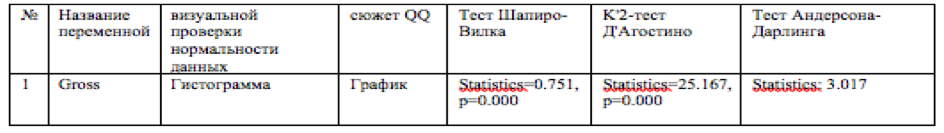